In [1]:
import pandas as pd

Import Data


In [2]:
df1 = pd.read_csv('./data/mexico-real-estate-1.csv')
df2 = pd.read_csv('./data/mexico-real-estate-2.csv')
df3 = pd.read_csv('./data/mexico-real-estate-3.csv')

Clean df1

Inspect Data:
shape, info, head

In [3]:
df1

,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150.0,"$67,965.56"
1,house,Nuevo León,25.688436,-100.198807,186.0,"$63,223.78"
2,apartment,Guerrero,16.767704,-99.764383,82.0,"$84,298.37"
3,apartment,Guerrero,16.829782,-99.911012,150.0,"$94,308.80"
4,house,Veracruz de Ignacio de la Llave,NaN,NaN,175.0,"$94,835.67"
...,...,...,...,...,...,...
695,house,Morelos,NaN,NaN,310.0,"$237,089.17"
696,house,Yucatán,21.050653,-89.558841,334.0,"$137,017.34"
697,house,Yucatán,21.343796,-89.262060,130.0,"$110,404.35"
698,apartment,Nuevo León,NaN,NaN,155.0,"$184,446.42"


In [4]:
df1.shape

(700, 6)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  700 non-null    object 
 1   state          700 non-null    object 
 2   lat            583 non-null    float64
 3   lon            583 non-null    float64
 4   area_m2        700 non-null    float64
 5   price_usd      700 non-null    object 
dtypes: float64(3), object(3)
memory usage: 32.9+ KB


Handle missing data and Format column type

In [6]:
df1.dropna(inplace=True)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 0 to 699
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  583 non-null    object 
 1   state          583 non-null    object 
 2   lat            583 non-null    float64
 3   lon            583 non-null    float64
 4   area_m2        583 non-null    float64
 5   price_usd      583 non-null    object 
dtypes: float64(3), object(3)
memory usage: 31.9+ KB


In [8]:
df1['price_usd']

0       $67,965.56
1       $63,223.78
2       $84,298.37
3       $94,308.80
5      $105,191.37
          ...     
693    $115,910.26
694     $77,572.89
696    $137,017.34
697    $110,404.35
699     $56,637.97
Name: price_usd, Length: 583, dtype: object

In [9]:
df1['price_usd'] = df1['price_usd'].str.replace('$', '', regex = False)
df1['price_usd'] = df1['price_usd'].str.replace(',', '', regex = False)
df1['price_usd'] = df1['price_usd'].astype(float) 
df1['price_usd']

0       67965.56
1       63223.78
2       84298.37
3       94308.80
5      105191.37
         ...    
693    115910.26
694     77572.89
696    137017.34
697    110404.35
699     56637.97
Name: price_usd, Length: 583, dtype: float64

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 0 to 699
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  583 non-null    object 
 1   state          583 non-null    object 
 2   lat            583 non-null    float64
 3   lon            583 non-null    float64
 4   area_m2        583 non-null    float64
 5   price_usd      583 non-null    float64
dtypes: float64(4), object(2)
memory usage: 31.9+ KB


Clean df2

Transform price_mxn to price_usd
1 $ = 19 MXN

In [11]:
df2

,property_type,state,lat,lon,area_m2,price_mxn
0,apartment,Nuevo León,25.721081,-100.345581,72.0,1300000.0
1,apartment,Puebla,NaN,NaN,190.0,2500000.0
2,house,Morelos,23.634501,-102.552788,360.0,5300000.0
3,house,Morelos,NaN,NaN,76.0,820000.0
4,house,Puebla,NaN,NaN,200.0,1100000.0
...,...,...,...,...,...,...
695,house,Morelos,18.917542,-98.963181,140.0,1450000.0
696,house,Distrito Federal,19.472128,-99.146697,190.0,1943000.0
697,house,Estado de México,19.234984,-99.558175,115.0,2100000.0
698,house,Puebla,18.918714,-98.426639,90.0,890000.0


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  700 non-null    object 
 1   state          700 non-null    object 
 2   lat            571 non-null    float64
 3   lon            571 non-null    float64
 4   area_m2        700 non-null    float64
 5   price_mxn      700 non-null    float64
dtypes: float64(4), object(2)
memory usage: 32.9+ KB


In [13]:
df2.dropna(inplace=True)

In [14]:
#2014: 1USD = 19MXN
df2['price_usd'] = df2['price_mxn'] / 19
df2.drop(columns=['price_mxn'], inplace=True)

In [15]:
df2

,property_type,state,lat,lon,area_m2,price_usd
0,apartment,Nuevo León,25.721081,-100.345581,72.0,68421.052632
2,house,Morelos,23.634501,-102.552788,360.0,278947.368421
6,apartment,Estado de México,19.272040,-99.572013,85.0,65789.473684
7,house,San Luis Potosí,22.138882,-100.996510,158.0,111578.947368
8,apartment,Distrito Federal,19.394558,-99.129707,65.0,39904.736842
...,...,...,...,...,...,...
695,house,Morelos,18.917542,-98.963181,140.0,76315.789474
696,house,Distrito Federal,19.472128,-99.146697,190.0,102263.157895
697,house,Estado de México,19.234984,-99.558175,115.0,110526.315789
698,house,Puebla,18.918714,-98.426639,90.0,46842.105263


In [16]:
# df2['price_mxn'] = df2['price_mxn'] / 19
# df2.rename(columns={'price_mxn':'price_usd'})

In [17]:
df2

,property_type,state,lat,lon,area_m2,price_usd
0,apartment,Nuevo León,25.721081,-100.345581,72.0,68421.052632
2,house,Morelos,23.634501,-102.552788,360.0,278947.368421
6,apartment,Estado de México,19.272040,-99.572013,85.0,65789.473684
7,house,San Luis Potosí,22.138882,-100.996510,158.0,111578.947368
8,apartment,Distrito Federal,19.394558,-99.129707,65.0,39904.736842
...,...,...,...,...,...,...
695,house,Morelos,18.917542,-98.963181,140.0,76315.789474
696,house,Distrito Federal,19.472128,-99.146697,190.0,102263.157895
697,house,Estado de México,19.234984,-99.558175,115.0,110526.315789
698,house,Puebla,18.918714,-98.426639,90.0,46842.105263


Clean df3

place_with_parent_names and lat-lon need to str.split()

In [18]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_type            700 non-null    object 
 1   place_with_parent_names  700 non-null    object 
 2   lat-lon                  582 non-null    object 
 3   area_m2                  700 non-null    float64
 4   price_usd                700 non-null    float64
dtypes: float64(2), object(3)
memory usage: 27.5+ KB


In [19]:
df3.dropna(inplace=True)

In [20]:
df3[['lat', 'lon']] = df3['lat-lon'].str.split(',', expand=True)

In [21]:
df3['state'] = df3['place_with_parent_names'].str.split('|', expand=True)[2]

In [22]:
df3.drop(columns = ['lat-lon', 'place_with_parent_names'], inplace=True)

In [23]:
df3['lat'] = df3['lat'].astype(float)
df3['lon'] = df3['lon'].astype(float)

In [24]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 582 entries, 0 to 699
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  582 non-null    object 
 1   area_m2        582 non-null    float64
 2   price_usd      582 non-null    float64
 3   lat            582 non-null    float64
 4   lon            582 non-null    float64
 5   state          582 non-null    object 
dtypes: float64(4), object(2)
memory usage: 31.8+ KB


Concatenate DataFrame after cleaning

In [25]:
df = pd.concat([df1, df2, df3])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1736 entries, 0 to 699
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  1736 non-null   object 
 1   state          1736 non-null   object 
 2   lat            1736 non-null   float64
 3   lon            1736 non-null   float64
 4   area_m2        1736 non-null   float64
 5   price_usd      1736 non-null   float64
dtypes: float64(4), object(2)
memory usage: 94.9+ KB


In [27]:
df.to_csv('./data/mexico-real-estate-clean.csv', index = False)

In [28]:
df

,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150.0,67965.56
1,house,Nuevo León,25.688436,-100.198807,186.0,63223.78
2,apartment,Guerrero,16.767704,-99.764383,82.0,84298.37
3,apartment,Guerrero,16.829782,-99.911012,150.0,94308.80
5,house,Yucatán,21.052583,-89.538639,205.0,105191.37
...,...,...,...,...,...,...
695,house,Jalisco,20.532264,-103.484418,175.0,121178.91
696,house,Morelos,18.928986,-99.180215,100.0,47417.83
697,house,Yucatán,21.028404,-89.653006,81.0,39524.23
698,house,San Luis Potosí,22.118304,-101.032194,360.0,245050.24


EDA

Exploratory Data Analysis. 

In [29]:
! pip install matplotlib
! pip install plotly

In [30]:
import plotly.express as px

In [31]:
fig = px.scatter_mapbox(
    data_frame = df,
    lat = df['lat'],
    lon = df['lon'],
    center = {"lat": 19.43, "lon": -99.13},
    width = 600,
    height = 600,
    hover_data = ['price_usd']
)

fig.update_layout(mapbox_style = "open-street-map")

fig.show()

Categorical Data: "state"

In [32]:
df.state.value_counts()

Distrito Federal                   303
Estado de México                   179
Yucatán                            171
Morelos                            160
Querétaro                          128
Veracruz de Ignacio de la Llave    117
Puebla                              95
Nuevo León                          83
Jalisco                             60
San Luis Potosí                     55
Chiapas                             55
Guerrero                            49
Tamaulipas                          48
Quintana Roo                        38
Baja California                     29
Sinaloa                             26
Chihuahua                           20
Tabasco                             20
Hidalgo                             17
Baja California Sur                 15
Sonora                              12
Guanajuato                          12
Aguascalientes                      10
Nayarit                              9
Durango                              7
Tlaxcala                 

Numerical Data

In [52]:
df[['area_m2', 'price_usd']].describe()

,area_m2,price_usd
count,1736.000000,1736.000000
mean,170.261521,115331.980800
std,80.594539,65426.173793
min,60.000000,33157.894737
25%,101.750000,65789.473684
50%,156.000000,99262.132105
75%,220.000000,150846.665000
max,385.000000,326733.660000


In [34]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Distribution of Home Sizes')

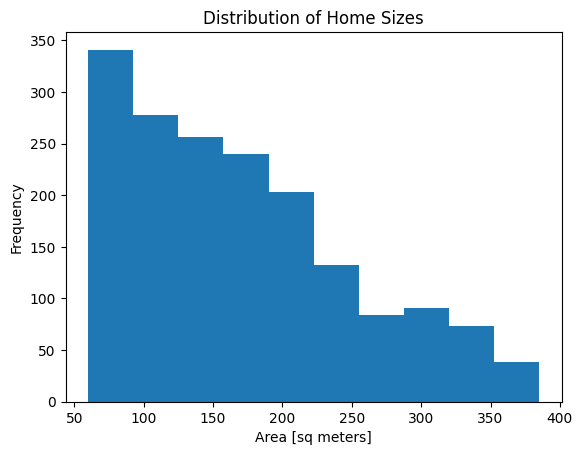

In [35]:
plt.hist(df['area_m2'])
plt.xlabel("Area [sq meters]")
plt.ylabel("Frequency")
plt.title("Distribution of Home Sizes")

Text(0.5, 1.0, 'Distribution of Home Sizes')

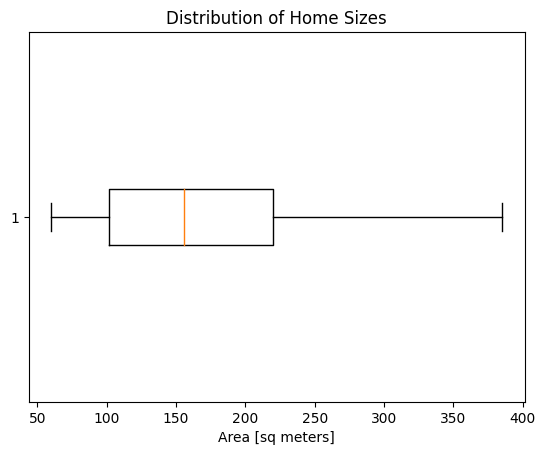

In [36]:
plt.boxplot(df['area_m2'], vert = False)
plt.xlabel('Area [sq meters]')
plt.title("Distribution of Home Sizes")

Text(0.5, 1.0, 'Distribution of Home Sizes')

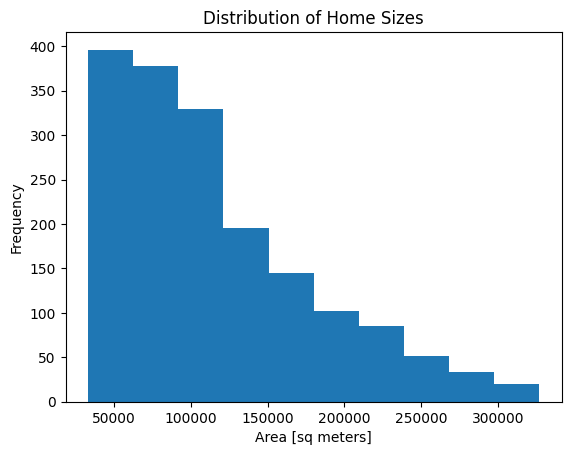

In [37]:
plt.hist(df['price_usd'])
plt.xlabel("Area [sq meters]")
plt.ylabel("Frequency")
plt.title("Distribution of Home Sizes")

Text(0.5, 1.0, 'Distribution of Home Sizes')

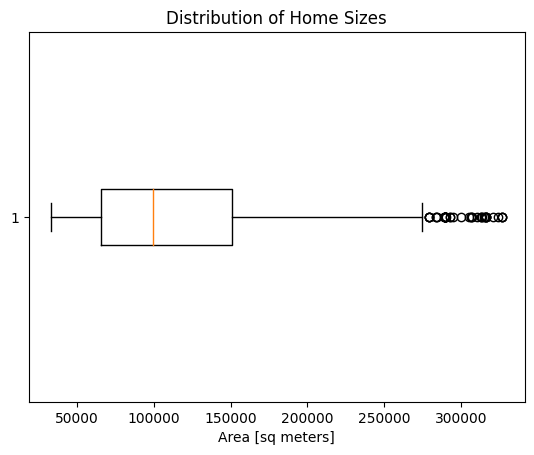

In [38]:
plt.boxplot(df['price_usd'], vert = False)
plt.xlabel('Area [sq meters]')
plt.title("Distribution of Home Sizes")

Research Question 1

Which state has the most expensive real-estate market?



In [39]:
df

,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150.0,67965.56
1,house,Nuevo León,25.688436,-100.198807,186.0,63223.78
2,apartment,Guerrero,16.767704,-99.764383,82.0,84298.37
3,apartment,Guerrero,16.829782,-99.911012,150.0,94308.80
5,house,Yucatán,21.052583,-89.538639,205.0,105191.37
...,...,...,...,...,...,...
695,house,Jalisco,20.532264,-103.484418,175.0,121178.91
696,house,Morelos,18.928986,-99.180215,100.0,47417.83
697,house,Yucatán,21.028404,-89.653006,81.0,39524.23
698,house,San Luis Potosí,22.118304,-101.032194,360.0,245050.24


In [40]:
mean_price_by_state = df.groupby(by ='state')['price_usd'].mean().sort_values(ascending = False)

<Axes: title={'center': 'Mean House Price by State'}, xlabel='State', ylabel='Mean_price_USD'>

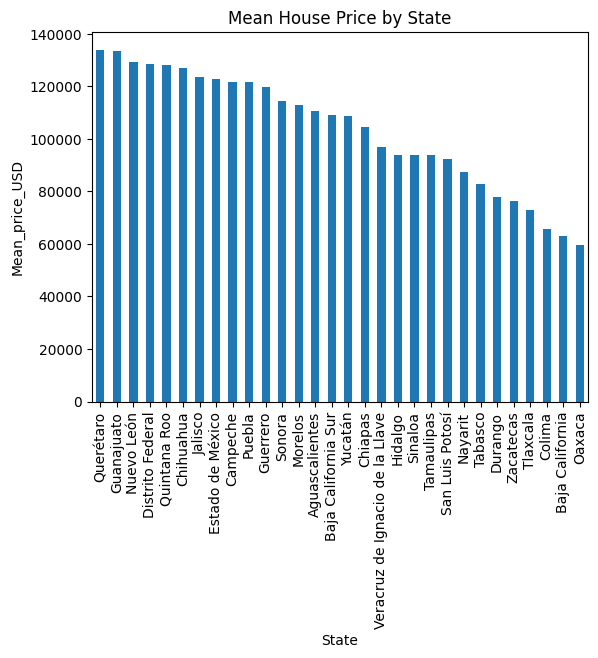

In [53]:
mean_price_by_state.plot(
    kind = 'bar',
    xlabel= 'State',
    ylabel = 'Mean_price_USD',
    title= "Mean House Price by State"
)

In [42]:
df['price_per_m2'] = df['price_usd'] / df['area_m2']

In [43]:
df

,property_type,state,lat,lon,area_m2,price_usd,price_per_m2
0,house,Estado de México,19.560181,-99.233528,150.0,67965.56,453.103733
1,house,Nuevo León,25.688436,-100.198807,186.0,63223.78,339.912796
2,apartment,Guerrero,16.767704,-99.764383,82.0,84298.37,1028.028902
3,apartment,Guerrero,16.829782,-99.911012,150.0,94308.80,628.725333
5,house,Yucatán,21.052583,-89.538639,205.0,105191.37,513.128634
...,...,...,...,...,...,...,...
695,house,Jalisco,20.532264,-103.484418,175.0,121178.91,692.450914
696,house,Morelos,18.928986,-99.180215,100.0,47417.83,474.178300
697,house,Yucatán,21.028404,-89.653006,81.0,39524.23,487.953457
698,house,San Luis Potosí,22.118304,-101.032194,360.0,245050.24,680.695111


<Axes: title={'center': 'Mean Price per M2 by State'}, xlabel='State', ylabel='Mean Price per M2'>

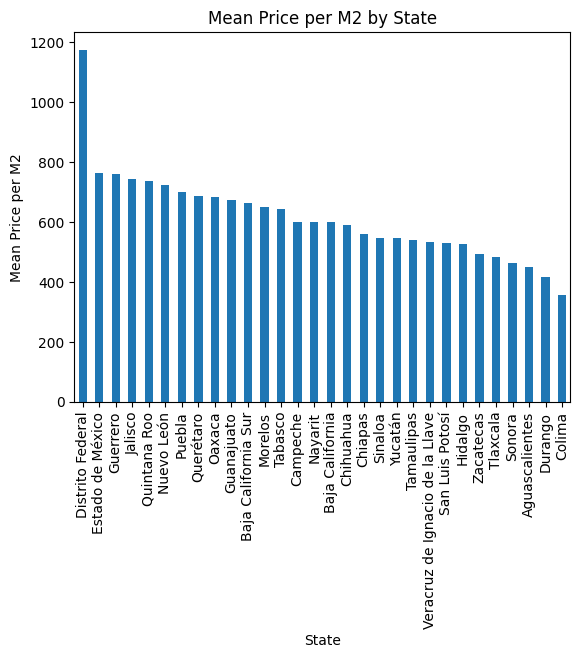

In [44]:
df.groupby(by ='state')['price_per_m2'].mean().sort_values(ascending = False).plot(
    kind = 'bar',
    xlabel= 'State',
    ylabel = 'Mean Price per M2',
    title= "Mean Price per M2 by State"
)

Research Question 2

Is there a relationship between home size and price?

Text(0.5, 1.0, 'Price vs Area')

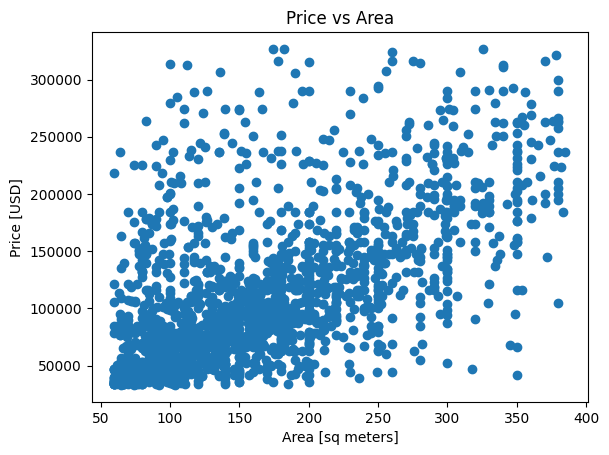

In [45]:
plt.scatter(x = df['area_m2'], y = df['price_usd'])
plt.xlabel('Area [sq meters]')
plt.ylabel('Price [USD]')
plt.title('Price vs Area')

In [46]:
p_correlation = df['area_m2'].corr(df['price_usd'])
print(p_correlation)

0.5855182454266905


In [47]:
df_morelos = df[df['state'] == 'Morelos']

Text(0.5, 1.0, 'Price vs Area')

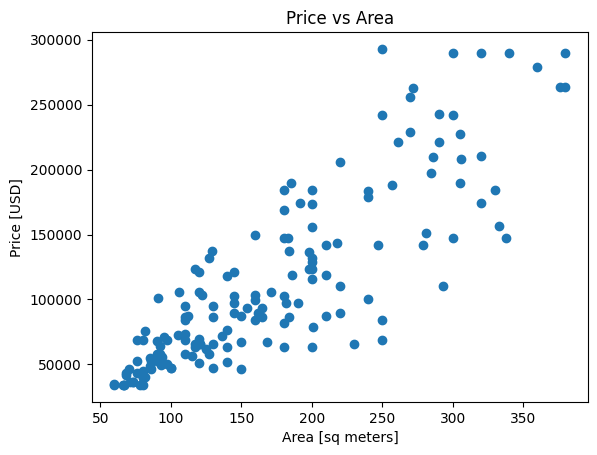

In [48]:
plt.scatter(x = df_morelos['area_m2'], y = df_morelos['price_usd'])
plt.xlabel('Area [sq meters]')
plt.ylabel('Price [USD]')
plt.title('Price vs Area')

In [49]:
p_correlation = df_morelos['area_m2'].corr(df_morelos['price_usd'])
print(p_correlation)

0.8498077614061482


0.41070392058534355


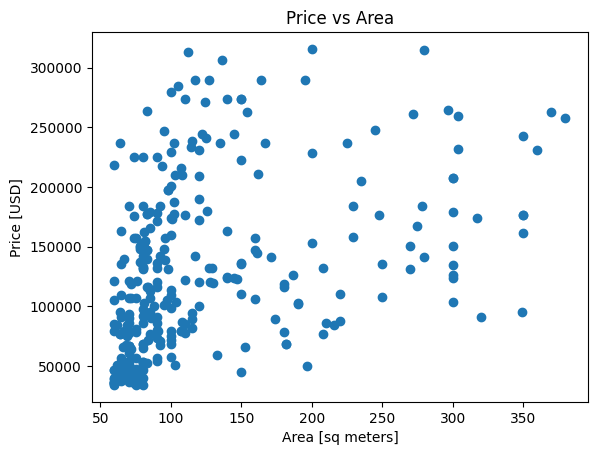

In [50]:
df_federal = df[df['state'] == 'Distrito Federal']

plt.scatter(x = df_federal['area_m2'], y = df_federal['price_usd'])
plt.xlabel('Area [sq meters]')
plt.ylabel('Price [USD]')
plt.title('Price vs Area')

p_correlation = df_federal['area_m2'].corr(df_federal['price_usd'])
print(p_correlation)